# Testing the *CoupledNormal* class

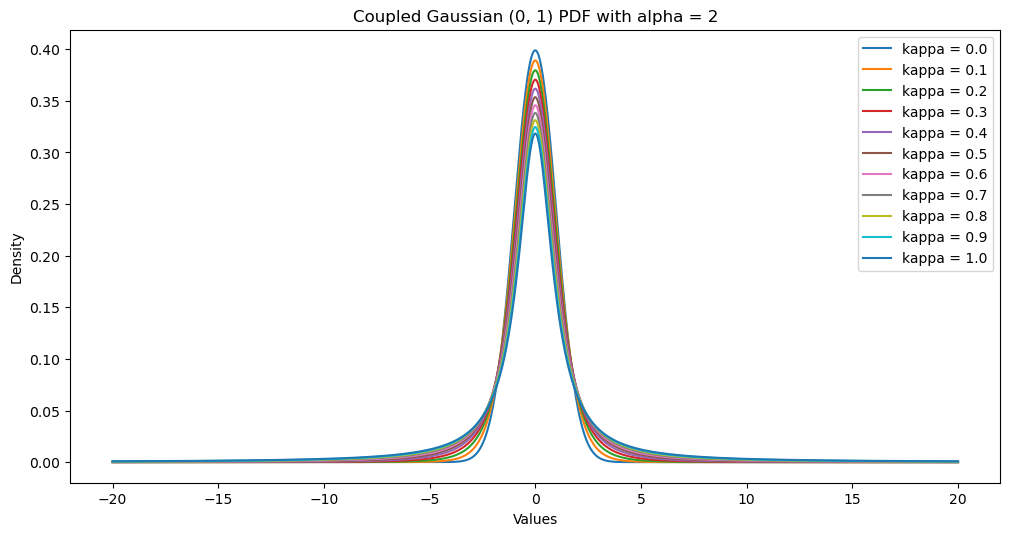

In [1]:
import function_john as fj
import function as func
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Define the loc, scale, alpha, and kappas that will be used for all distributions.
loc, scale = 0, 1
alpha = 2

# Define the values the various Coupled Gaussians can range from -6*scale to 6*scale
x = np.linspace(-20*scale, 20*scale, 10000)

# Plot Coupled Gaussians (loc, scale) with alpha = 2, with kappas going from 0 to 1
# by steps of 0.1
plt.figure(figsize=(12, 6), dpi= 100, facecolor='w', edgecolor='k')

for kappa in np.linspace(0, 1, 11):
    temp_normal = fj.CoupledNormal(loc=loc,
                                   scale=scale,
                                   kappa=round(kappa, 1),
                                   alpha=alpha)
    plt.plot(x, temp_normal.prob(x), label=f'kappa = {temp_normal.kappa}')
    
plt.title(f'Coupled Gaussian ({loc}, {scale}) PDF with alpha = {alpha}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()

plt.show()

# Testing the *coupled_logarithm* function

In [2]:
# Define the two kappa values used with two instances of the CoupledNormal class.
kappas = (0, 0.5)
# We are dealing with 1-dimensional distributions, so set dim = 1.
dim = 1

# Create an instance of the CoupledNormal class.
normal = fj.CoupledNormal(loc=loc,
                          scale=scale,
                          kappa=kappas[0],
                          alpha=alpha)
# Calculate the densities of the instance over x.
normal_densities = normal.prob(x)

# Create an instance of the CoupledNormal class.
other_normal = fj.CoupledNormal(loc=loc,
                                scale=scale,
                                kappa=kappas[1],
                                alpha=alpha) 
# Calculate the densities of the instance over x.
other_normal_densities = other_normal.prob(x)

# Calculate the distance between values of x for numerical integration.
dx = np.mean(x[1:] - x[:-1])

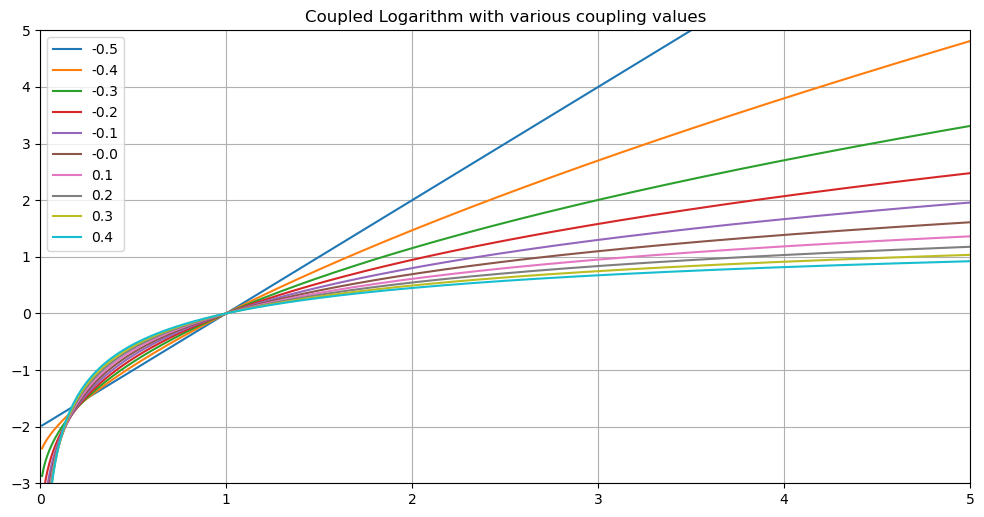

In [3]:
x_log = np.arange(0.01, 5.01, 0.01)

plt.figure(figsize=(12, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlim(0, 5)
plt.ylim(-3, 5)
for kappa in np.round(np.arange(-0.5, 0.5, 0.1), 2):
    plt.plot(x_log, -fj.coupled_logarithm(x_log**-1, kappa=kappa, dim=dim), label=f'{kappa}')
plt.title('Coupled Logarithm with various coupling values')
plt.legend()
plt.grid()
plt.show()

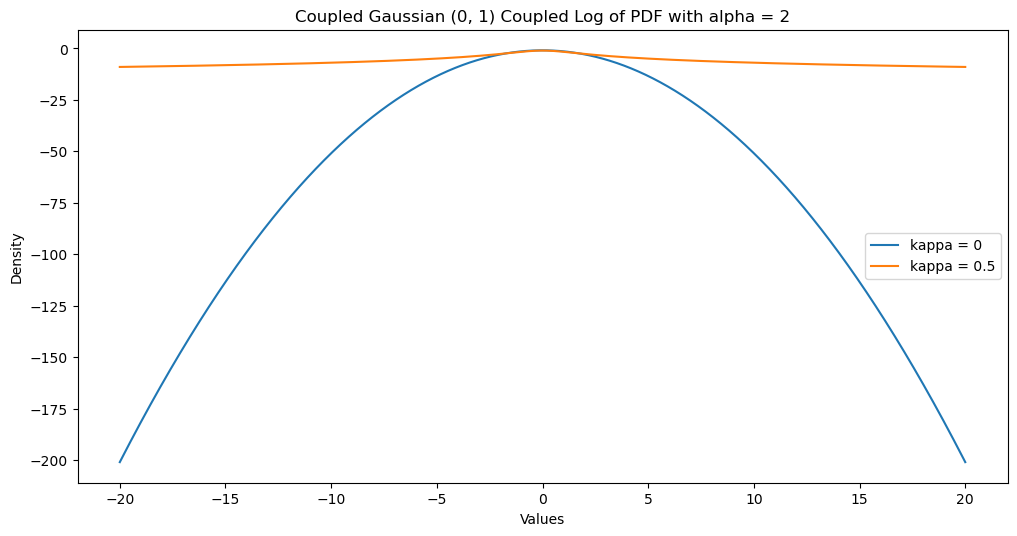

In [4]:
coupled_norm_log_densities = fj.coupled_logarithm(normal_densities, kappa=kappas[0], dim=dim)
coupled_other_norm_log_densities = fj.coupled_logarithm(other_normal_densities, kappa=kappas[0], dim=dim)

plt.figure(figsize=(12, 6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(x, coupled_norm_log_densities, label=f'kappa = {normal.kappa}')
plt.plot(x, coupled_other_norm_log_densities, label=f'kappa = {other_normal.kappa}')
plt.title(f'Coupled Gaussian ({loc}, {scale}) Coupled Log of PDF with alpha = {alpha}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Testing the *coupled_exponential* function

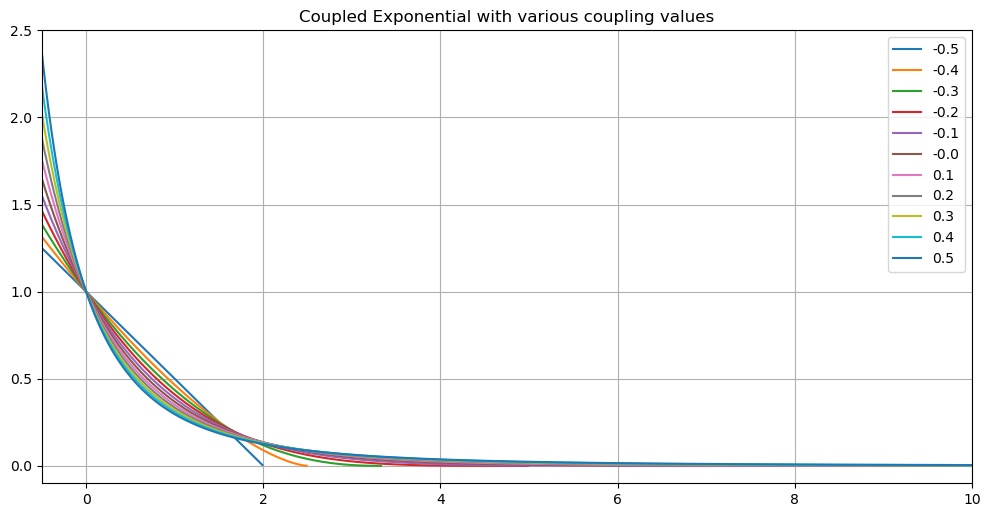

In [5]:


plt.figure(figsize=(12, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.xlim(-0.5, 10)
plt.ylim(-0.1, 2.5)
for kappa in np.round(np.arange(-0.5, 0.51, 0.1), 2):
    if kappa < 0:
        x_exp = np.arange(-1, -(1/kappa), 0.01)
    else:
        x_exp = np.arange(-1, 10.01, 0.01)
    plt.plot(x_exp, fj.coupled_exponential(x_exp, kappa=kappa, dim=dim)**-1, label=f'{kappa}')
plt.title('Coupled Exponential with various coupling values')
plt.legend()
plt.grid()
plt.show()

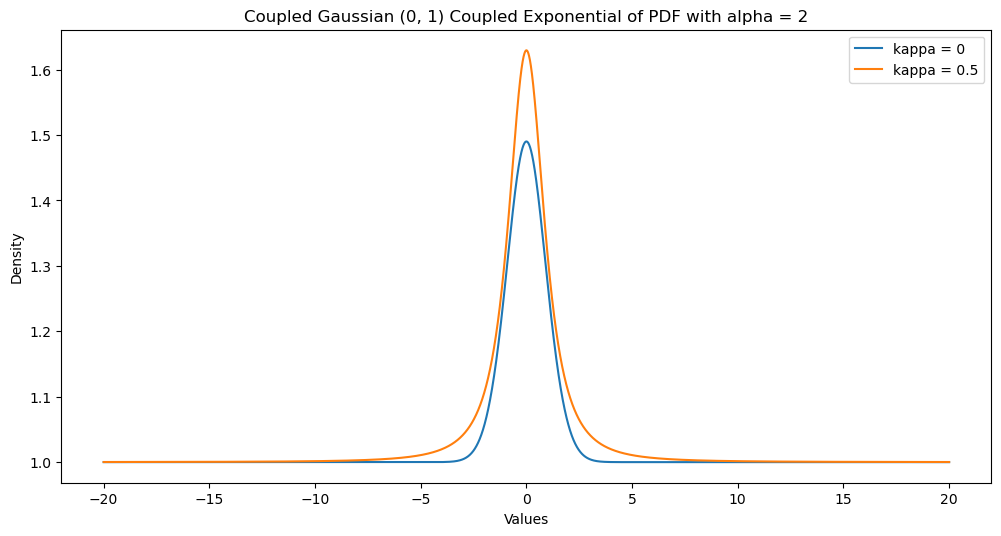

In [6]:
coupled_norm_exp_densities = fj.coupled_exponential(normal_densities, kappa=kappas[0], dim=dim)
coupled_other_norm_exp_densities = fj.coupled_exponential(other_normal_densities, kappa=kappas[1], dim=dim)

plt.figure(figsize=(12, 6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(x, coupled_norm_exp_densities, label=f'kappa = {normal.kappa}')
plt.plot(x, coupled_other_norm_exp_densities, label=f'kappa = {other_normal.kappa}')
plt.title(f'Coupled Gaussian ({loc}, {scale}) Coupled Exponential of PDF with alpha = {alpha}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Testing the *coupled_cross_entropy* function

In [7]:
fj.coupled_cross_entropy(normal_densities, other_normal_densities, dx=dx, kappa=kappas[0], alpha=alpha, dim=dim, root=False)

1.5361670503433218

In [8]:
fj.coupled_cross_entropy(normal_densities, other_normal_densities, dx=dx, kappa=kappas[1], alpha=alpha, dim=dim, root=True)

1.7446126498563264

# Testing the *coupled_entropy* function

In [9]:
(fj.coupled_entropy(normal_densities, dx=dx, kappa=kappas[0], alpha=alpha, dim=dim, root=False),
 func.coupled_entropy(normal_densities, kappa=kappas[0], alpha=alpha, d=dim, root=False, integration='trapz'))

(1.4189385332046722, 1.4189385332046727)

In [10]:
(fj.coupled_entropy(other_normal_densities, dx=dx, kappa=kappas[1], alpha=alpha, dim=dim, root=True),
 func.coupled_entropy(other_normal_densities, kappa=kappas[1], alpha=alpha, d=dim, root=True, integration='trapz'))

(1.8537407313159608, 1.853740731315961)

# Testing the *coupled_divergence* function

In [11]:
fj.coupled_divergence(normal_densities, other_normal_densities, dx=dx, kappa=kappas[0], alpha=alpha, dim=dim, root=False)

0.11722851713864957

In [12]:
fj.coupled_divergence(normal_densities, other_normal_densities, dx=dx, kappa=kappas[0], alpha=alpha, dim=dim, root=True)

0.08253864409753531

In [13]:
fj.coupled_divergence(other_normal_densities, normal_densities, dx=dx, kappa=kappas[1], alpha=alpha, dim=dim, root=False)

2.1118356070686338e+51

In [14]:
fj.coupled_divergence(other_normal_densities, normal_densities, dx=dx, kappa=kappas[1], alpha=alpha, dim=dim, root=True)

5.0171497670638685e+22

In [15]:
fj.coupled_divergence(normal_densities, normal_densities, dx=dx, kappa=kappas[0], alpha=alpha, dim=dim, root=True)

0.0

# Plotting the *coupled_entropy* function

In [16]:
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
plot_tsallisEntropyNormalized = []
plot_tsallisEntropy = []
plot_tsallisEntropyRootNormalized = []
plot_tsallisEntropyRoot = []
plot_shannonEntropy = []
plot_shannonEntropy_root = []

kappa_values = [round(value, 1) for value in np.arange(0.0, 4, 0.1)]
n = len(kappa_values)

mu, sigma = 0, 1
alpha = 2
for kappa in kappa_values:
    temp_normal = fj.CoupledNormal(loc=loc,
                                   scale=scale,
                                   kappa=kappa,
                                   alpha=alpha)
    y = temp_normal.prob(x)
    Y[kappa] = fj.coupled_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, root=False)
    plot_coupledEntropy.append(Y[kappa])
    Y[kappa] = fj.coupled_entropy(y, kappa=kappa, dx=dx, alpha=alpha, dim=dim, root=True)
    plot_coupledEntropy_root.append(Y[kappa])
    Y[kappa] = fj.tsallis_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, normalize=True, root=False)
    plot_tsallisEntropyNormalized.append(Y[kappa])
    Y[kappa] = fj.tsallis_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, normalize=False, root=False)
    plot_tsallisEntropy.append(Y[kappa])
    Y[kappa] = fj.tsallis_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, normalize=True, root=True)
    plot_tsallisEntropyRootNormalized.append(Y[kappa])
    Y[kappa] = fj.tsallis_entropy(y, dx=dx, kappa=kappa, alpha=alpha, dim=dim, normalize=False, root=True)
    plot_tsallisEntropyRoot.append(Y[kappa])
    Y[kappa] = fj.shannon_entropy(y, dx=dx, dim=dim, root=False)
    plot_shannonEntropy.append(Y[kappa])
    Y[kappa] = fj.shannon_entropy(y, dx=dx, dim=dim, root=True)
    plot_shannonEntropy_root.append(Y[kappa])

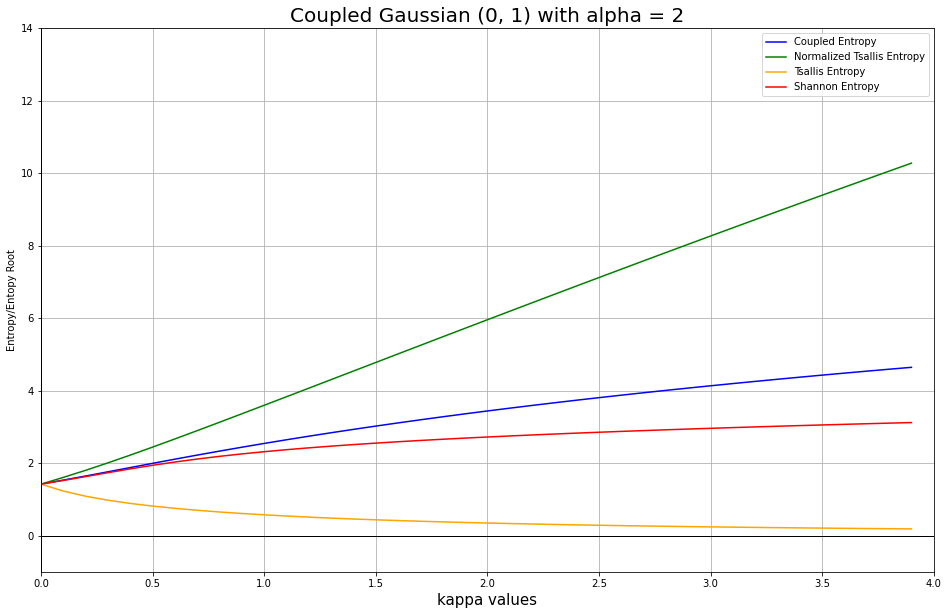

In [17]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 14)
plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Normalized Tsallis Entropy',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy',
         color='red')
plt.grid()
plt.title(f'Coupled Gaussian {round(mu), round(sigma)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

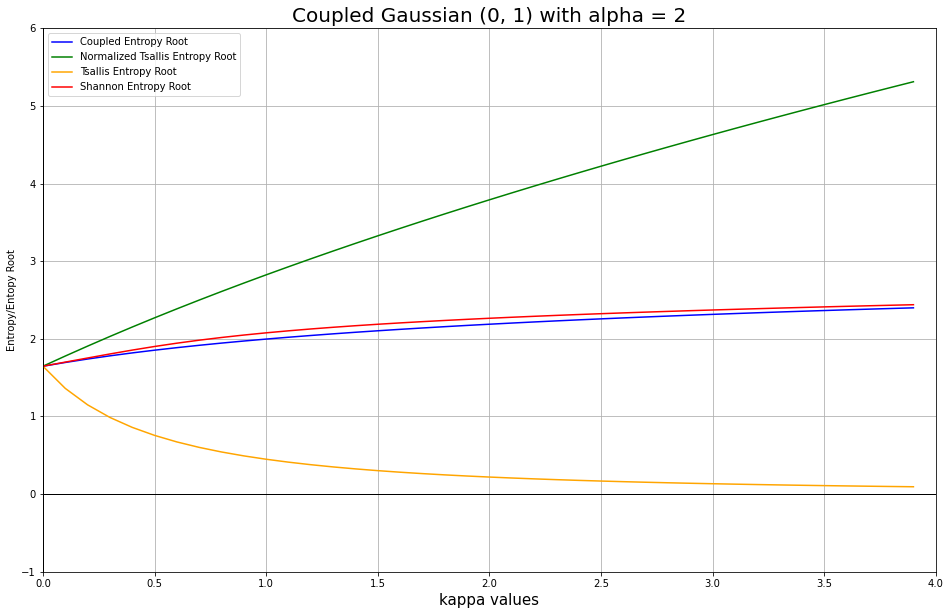

In [18]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 6)

plt.plot(kappa_values, plot_coupledEntropy_root, label='Coupled Entropy Root',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyRootNormalized, label='Normalized Tsallis Entropy Root',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropyRoot, label='Tsallis Entropy Root',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy_root, label='Shannon Entropy Root',
         color='red')
plt.grid()
plt.title(f'Coupled Gaussian {round(mu), round(sigma)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();